In [9]:
import pandas as pd

file_path = "D:\\ELEVATE_LAB'S_INTERNSHIP\\TASK-1\\Titanic-Dataset.csv"
df = pd.read_csv(file_path)

print("Shape:", df.shape)
print("Columns:", df.columns)
print("Data Types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())
display(df.head())


Shape: (891, 12)
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:

df_cleaned = df.copy()

# Fill 'Age' with median, 'Fare' with median, 'Embarked' with mode
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
df_cleaned['Fare'].fillna(df_cleaned['Fare'].median(), inplace=True)
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' (too many missing values)
df_cleaned.drop(columns=['Cabin'], inplace=True)

print("Missing after cleaning:\n", df_cleaned.isnull().sum())


Missing after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_8344\2764571329.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8344\2764571329.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['Sex'] = le.fit_transform(df_cleaned['Sex'])
df_cleaned['Embarked'] = le.fit_transform(df_cleaned['Embarked'])

# Drop non-informative columns
df_cleaned.drop(columns=['Name', 'Ticket'], inplace=True)

display(df_cleaned.head())


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

print(df_cleaned[num_cols].head())

        Age      Fare     SibSp     Parch
0 -0.565736 -0.502445  0.432793 -0.473674
1  0.663861  0.786845  0.432793 -0.473674
2 -0.258337 -0.488854 -0.474545 -0.473674
3  0.433312  0.420730  0.432793 -0.473674
4  0.433312 -0.486337 -0.474545 -0.473674


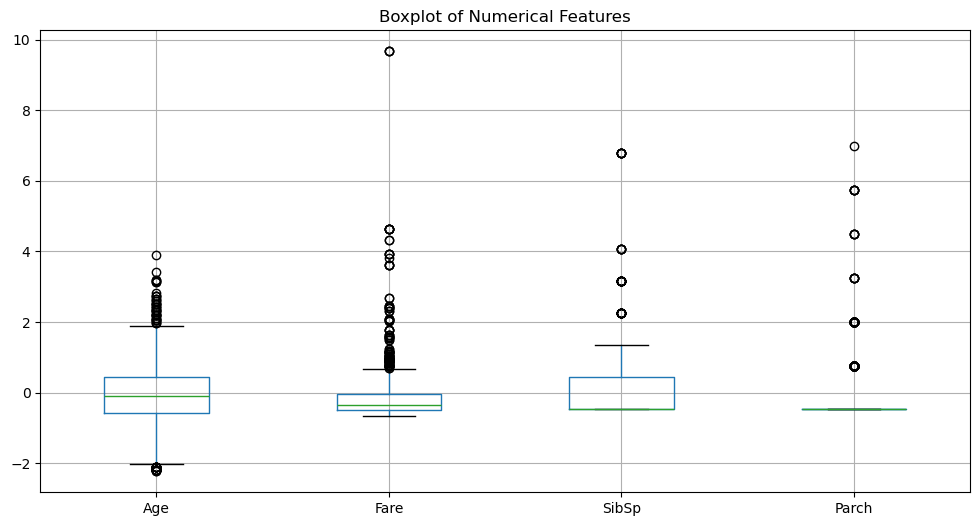

(577, 9)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_cleaned[num_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.show()

# Remove outliers using IQR method
for col in num_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned[(df_cleaned[col] >= Q1 - 1.5 * IQR) & (df_cleaned[col] <= Q3 + 1.5 * IQR)]

print("Shape after outlier removal:", df_cleaned.shape)